In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv("C:/Users/Admin/Desktop/20212/AppliedStatisticsProject20212/dataset/data_train.csv")
data_test = pd.read_csv("C:/Users/Admin/Desktop/20212/AppliedStatisticsProject20212/dataset/data_test.csv")

In [3]:
data_train = data_train.set_index(['user_id', 'product_id'])
data_test = data_test.set_index(['user_id', 'product_id'])

In [4]:
from sklearn.model_selection import train_test_split
X = data_train.drop('reordered', axis=1)
y = data_train.reordered
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y,
                                                 test_size = 0.3, random_state = 42)

In [5]:
X.head()

uxp_total_bought  uxp_reorder_ratio  u_total_orders  \
user_id product_id                                                        
1       196                       10           1.000000              10   
        10258                      9           1.000000              10   
        10326                      1           0.166667              10   
        12427                     10           1.000000              10   
        13032                      3           0.333333              10   

                    u_reordered_ratio  p_total_purchases  p_reorder_ratio  
user_id product_id                                                         
1       196                  0.694915              35791         0.776480  
        10258                0.694915               1946         0.713772  
        10326                0.694915               5526         0.652009  
        12427                0.694915               6476         0.740735  
        13032                0.694915               3751         0.657158

In [6]:
#Using SMOTE to handle imbalanced classes
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.head()
# oversampled_train.columns = X.columns

,reordered,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio
0,0.0,1,0.030303,37,0.825843,6475,0.441544
1,0.0,1,1.000000,19,0.666667,1002,0.181637
2,0.0,2,0.064516,33,0.794118,6719,0.284566
3,0.0,13,0.481481,38,0.893506,874,0.586957
4,0.0,3,0.068182,99,0.815073,3340,0.608683


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_depth=20,min_samples_split=3,n_jobs=-1, random_state = 42)
model.fit(oversampled_train.drop('reordered', axis=1), oversampled_train.reordered)

In [13]:
from sklearn.metrics import classification_report
predictions = model.predict(X_val)
print("Test Dataset")
print(classification_report(y_val, predictions))


predictions_train = model.predict(X_train)
print("Train Dataset")
print(classification_report(y_train, predictions_train))

Test Dataset
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91   2293393
         1.0       0.31      0.53      0.39    249006

    accuracy                           0.84   2542399
   macro avg       0.63      0.70      0.65   2542399
weighted avg       0.88      0.84      0.86   2542399

Train Dataset
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92   5352444
         1.0       0.36      0.61      0.45    579818

    accuracy                           0.86   5932262
   macro avg       0.66      0.75      0.68   5932262
weighted avg       0.90      0.86      0.87   5932262



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.87029654 0.12970346]
 [0.46645061 0.53354939]]


<Figure size 864x864 with 0 Axes>

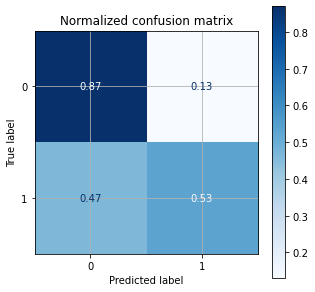

In [14]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Plot normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(12,12))
disp = plot_confusion_matrix(xg_cl, X_val, y_val,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize="true")
disp.ax_.set_title("Normalized confusion matrix")

print("Normalized confusion matrix")
print(disp.confusion_matrix)
plt.grid(b=None)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()